## 정리
- "[CASE_STUDY]Tele Customer Churm Prediction.ipynb"에서 사용된 시각화 기법과 [Bank Customer Churn 💸 Prediction| EDA📊| Model](https://www.kaggle.com/code/ashishkumarak/bank-customer-churn-prediction-eda-model/notebook)를 참고하여 'Bank Customer Churn Prediction' 데이터에 대한 EDA를 진행하였습니다.
- 전체적으로 데이터의 분포와 경향을 확인하고, 타겟 컬럼인 exited와 특성들간의 관계를 확인하여 향후 모델링에서 어떤 특성을 선택하는 것이 좋을지 가설을 설정하는 것을 목표로 했습니다.
- 기존의 컬럼을 활용하여 새로운 컬럼을 만들어 내려고 했습니다.(ex. 서울시 범죄 데이터 분석) 결과적으로 여기선 유의미한 변수를 만들어 내진 못했지만, 사용하는 데이터가 제한되어 있는만큼 시각화 및 향후 분석에서 사용될 새로운 특성을 발견하는게 EDA 과정에서 중요하다고 생각합니다.

## 임포트

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [2]:
df = pd.read_csv('../data/bank_turnover/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


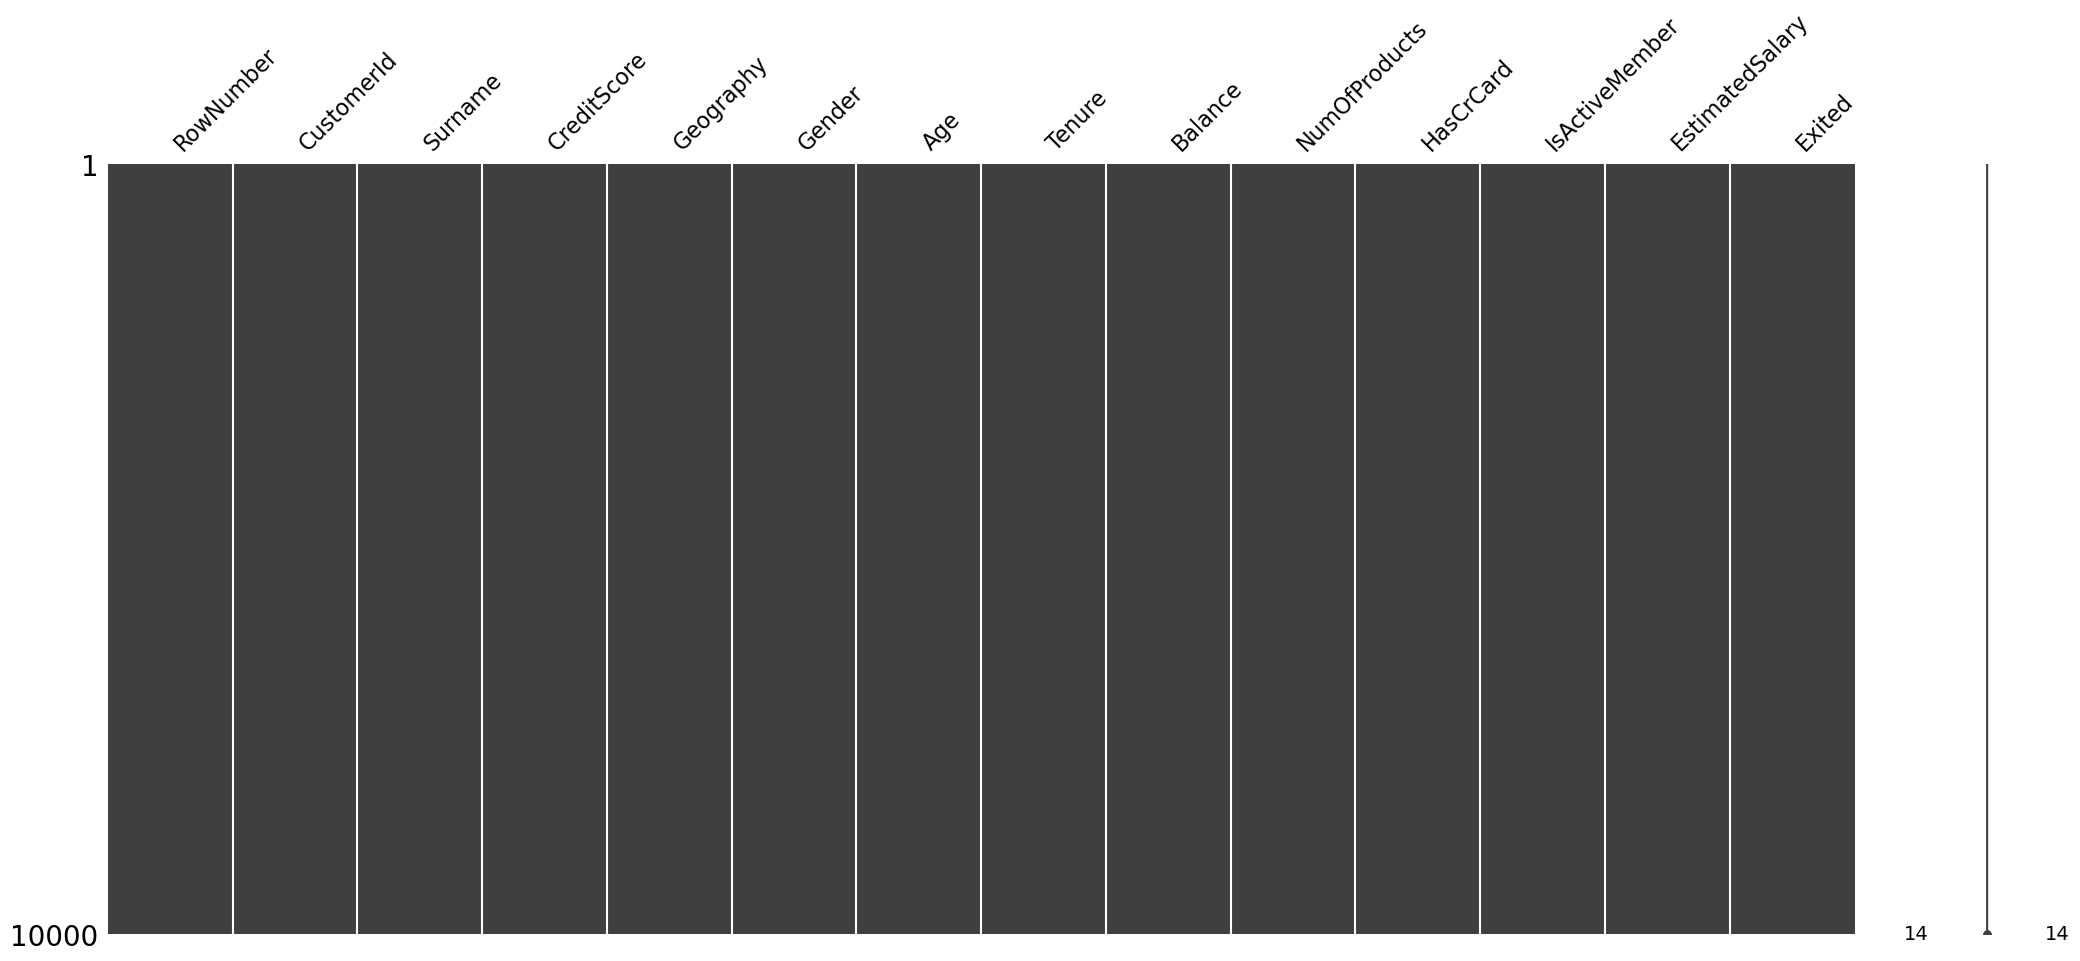

In [3]:
# 결측치 확인
msno.matrix(df)
plt.show()

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop('rownumber', axis=1, inplace=True)
ids = df['customerid']
df.drop('customerid', axis=1, inplace=True)

In [7]:
df['geography'].value_counts()

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## 분포 확인

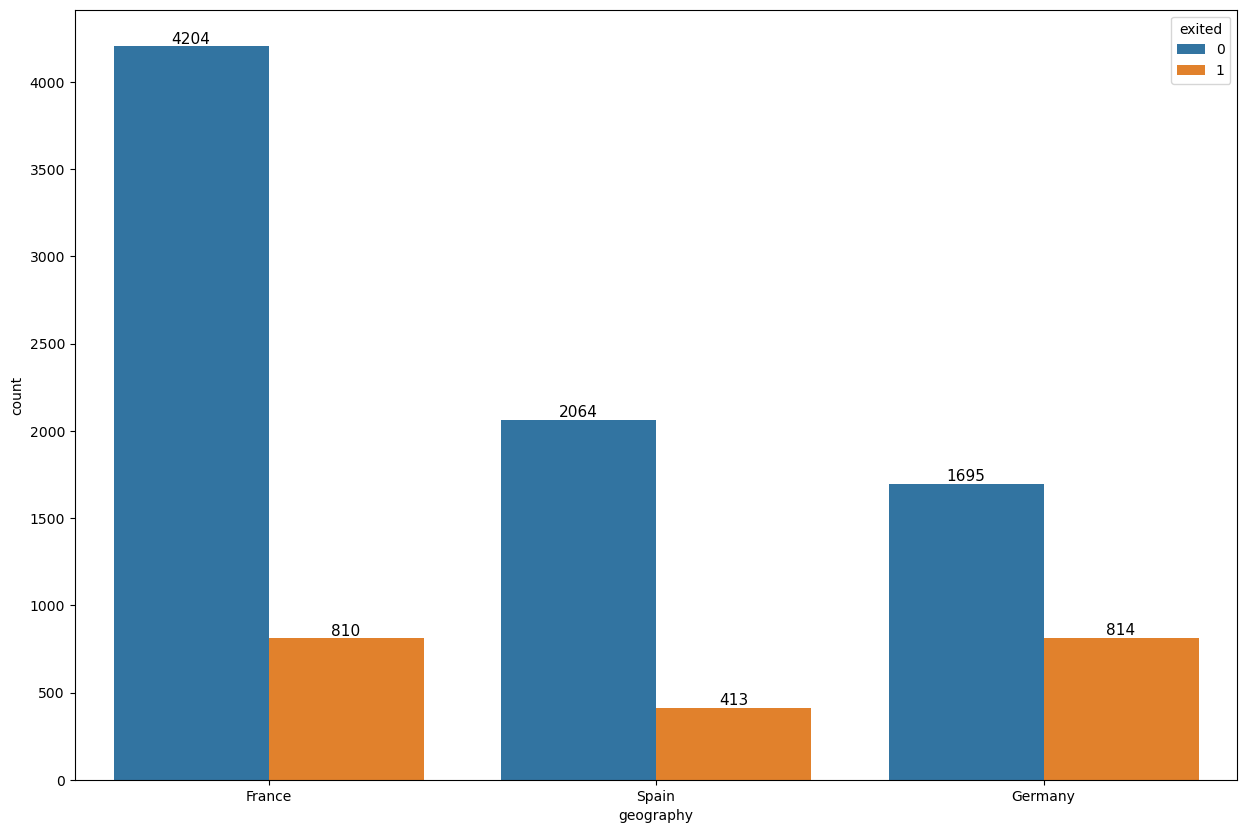

In [8]:
def with_commas(x):
    return "{:,}".format(int(x))

def draw_countplot(x, hue, figsize=(10, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df)
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=11)
    ax.bar_label(ax.containers[1], label_type='edge', fontsize=11)
    plt.show()


draw_countplot('geography', 'exited', figsize=(15, 10))

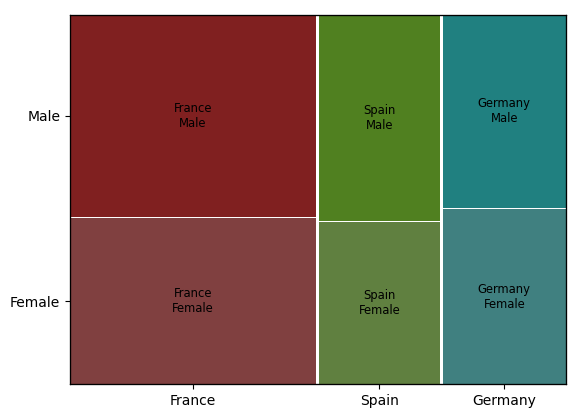

In [9]:
# 모자익 플롯 그리기
mosaic(df, ['geography', 'gender'])
plt.show()

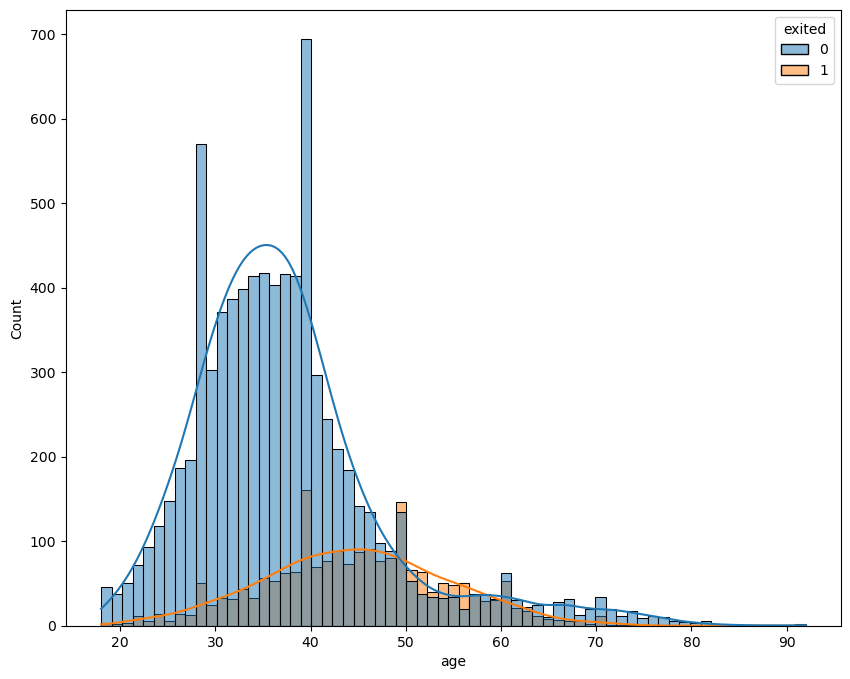

In [10]:
def draw_histplot(x, hue, figsize=(10, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(x=x, hue=hue, data=df, kde=True)
    plt.show()

draw_histplot('age', 'exited', figsize=(10, 8))

- 50대의 경우 이탈 고객 수가 더 많음

In [11]:
# 나이를 범주형 컬럼으로 변환
def age_to_cat(df):
    df['age_cat'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
    return df

df = age_to_cat(df)
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,age_cat
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50


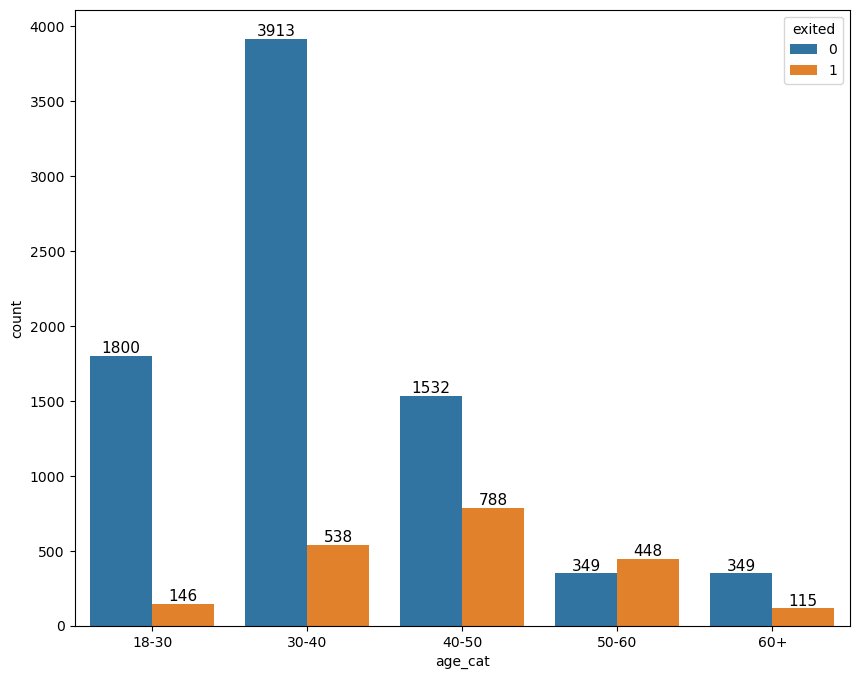

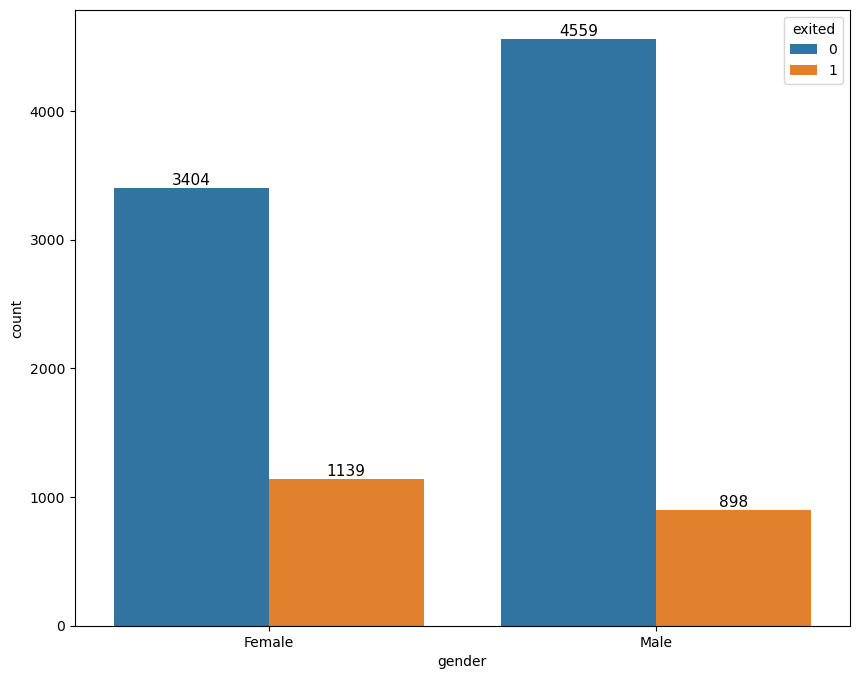

In [12]:
draw_countplot('age_cat', 'exited', figsize=(10, 8))
draw_countplot('gender', 'exited', figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

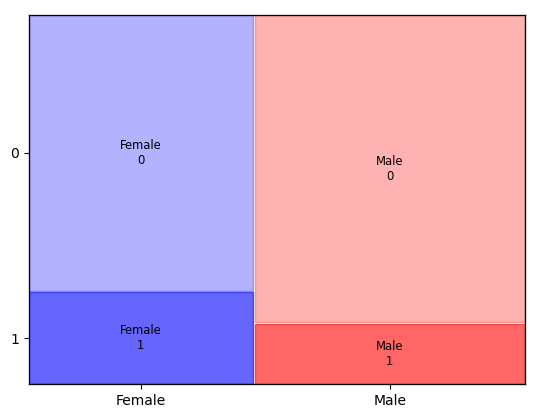

In [13]:
def props(key):
    alpha = {'1': 0.6, '0': 0.3}
    colors = {'Female': (0.0, 0.0, 1.0), 'Male': (1.0, 0.0, 0.0)}
    
    color = colors.get(key[0], (0, 0, 0))
    color_val = alpha.get(key[1], 1)

    return {'color': color + (color_val,)}


plt.figure(figsize=(10, 8))
mosaic(df, ['gender', 'exited'], properties=props)
plt.show()

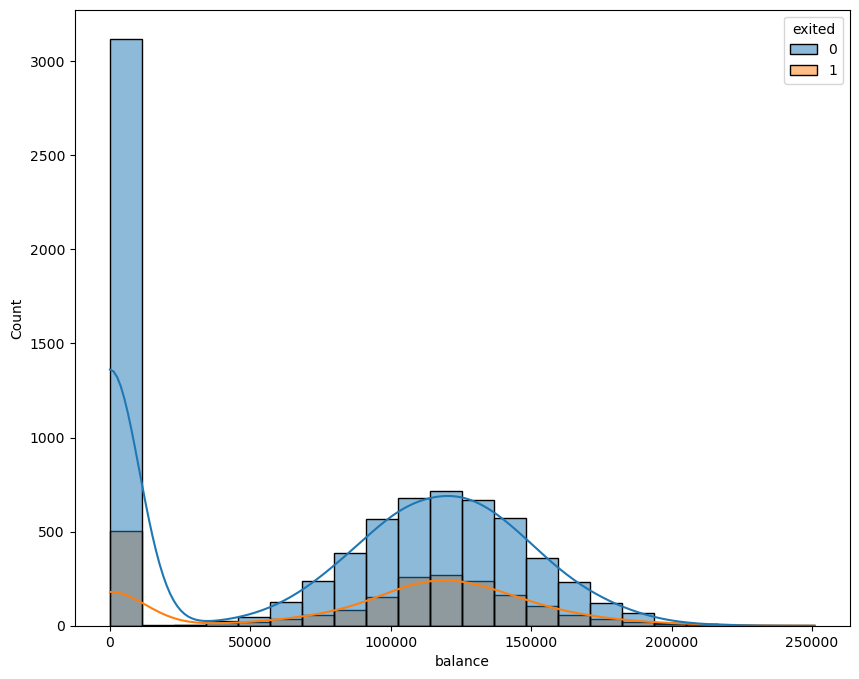

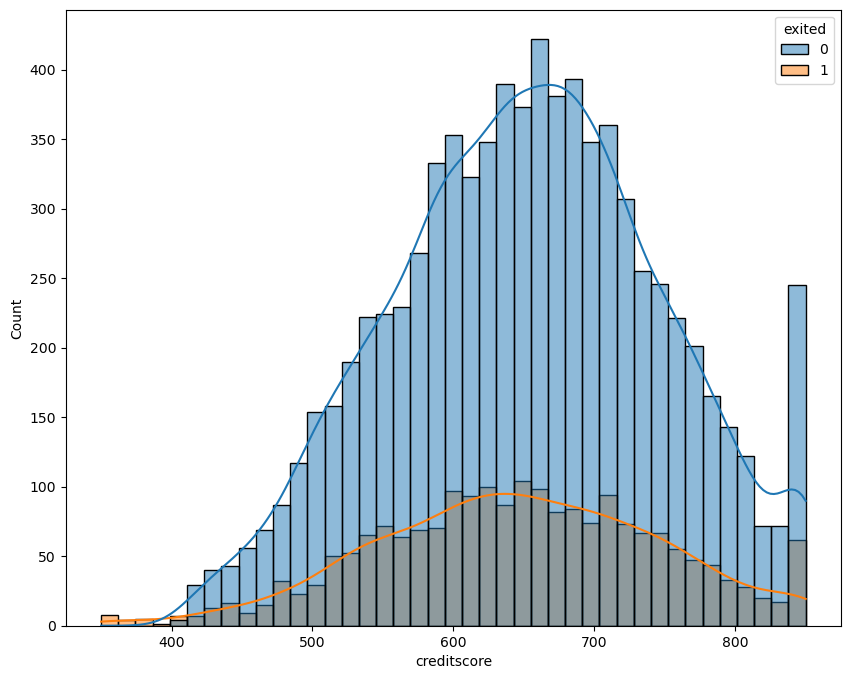

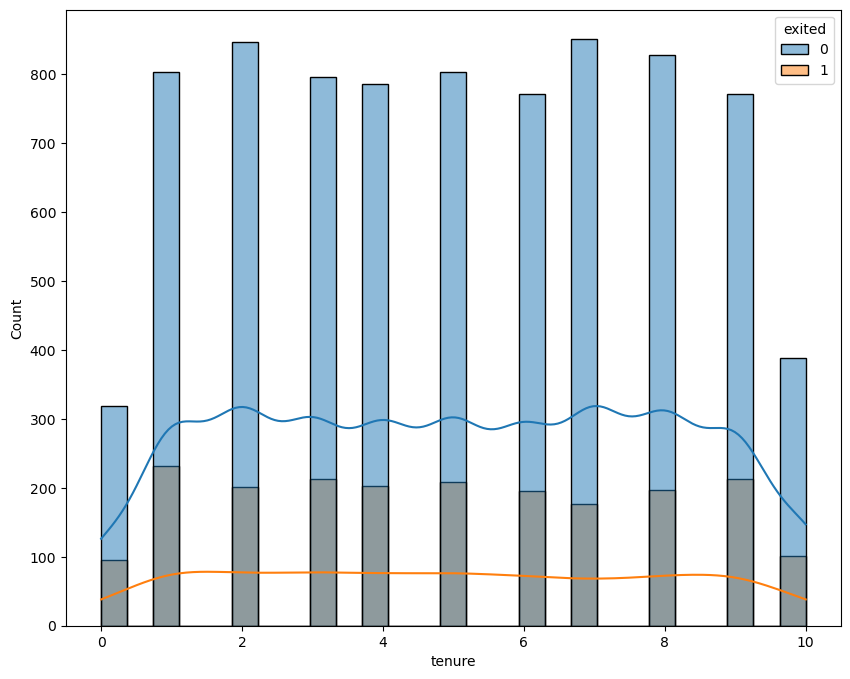

In [14]:
draw_histplot('balance', 'exited', figsize=(10, 8))
draw_histplot('creditscore', 'exited', figsize=(10, 8))
draw_histplot('tenure', 'exited', figsize=(10, 8))

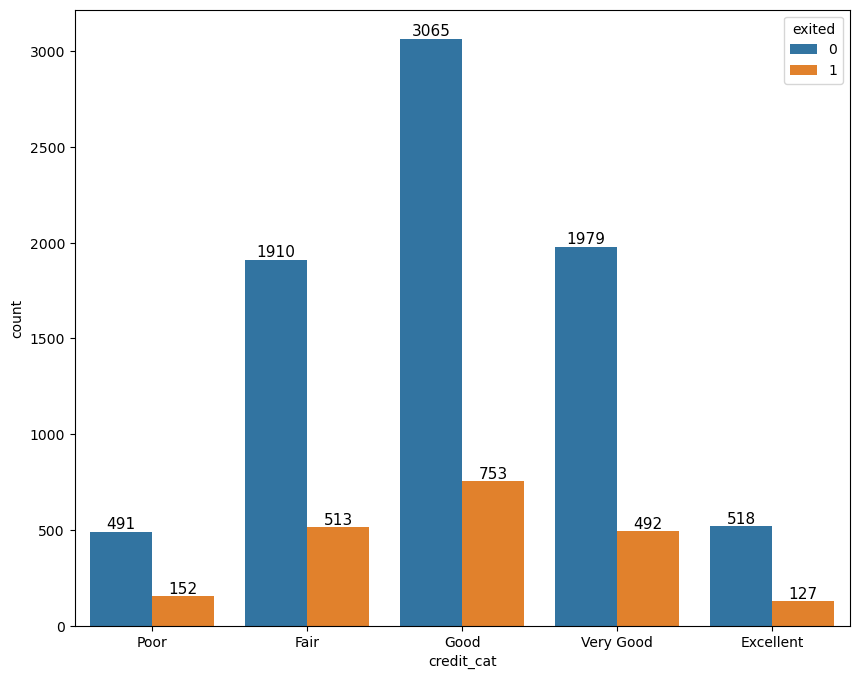

In [15]:
# 신용점수를 범주형 컬럼으로 변환
df['credit_cat'] = pd.cut(df['creditscore'], bins=[0, 500, 600, 700, 800, 1000], labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
draw_countplot('credit_cat', 'exited', figsize=(10, 8))

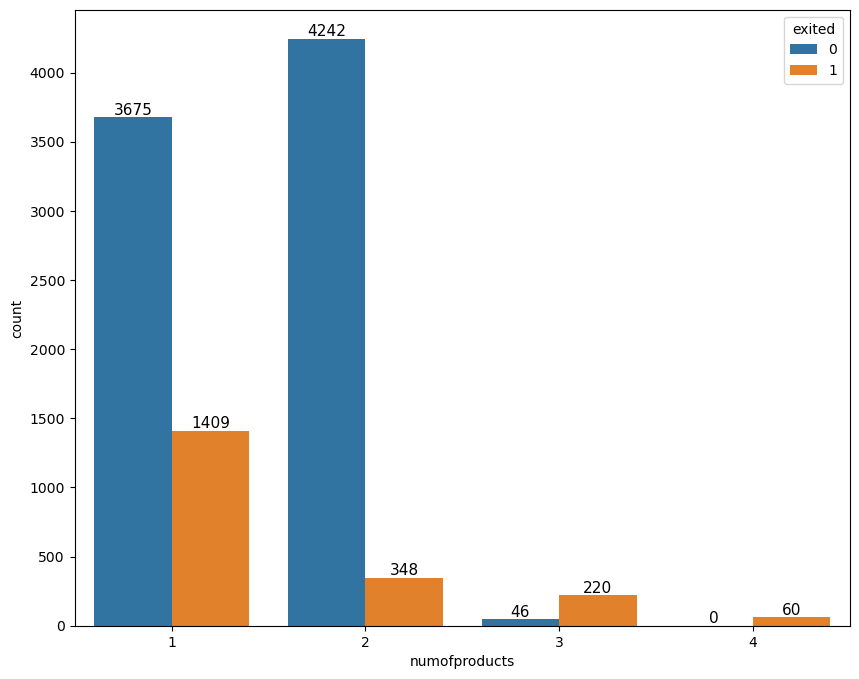

In [16]:
draw_countplot('numofproducts', 'exited', figsize=(10, 8))

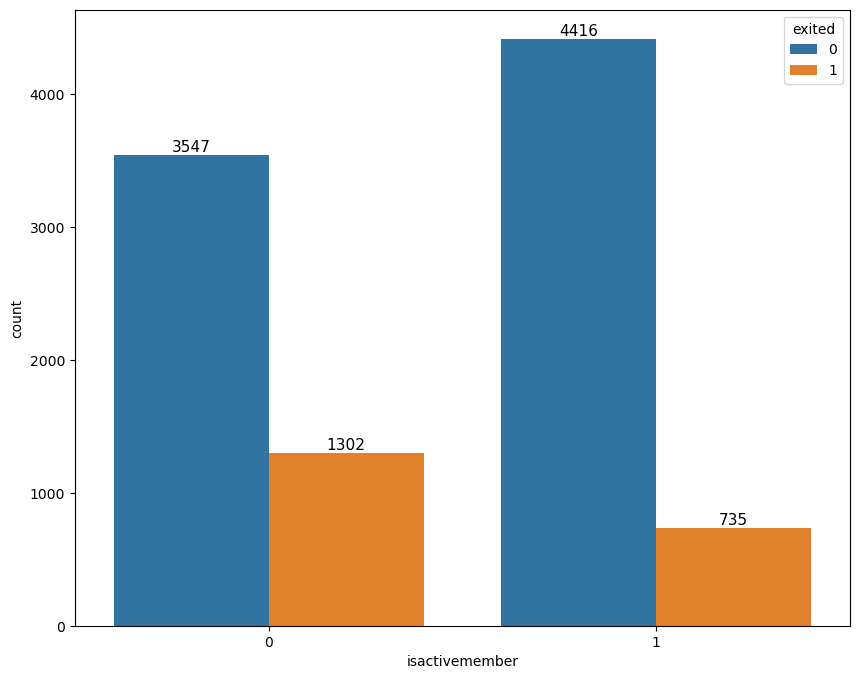

In [17]:
draw_countplot('isactivemember', 'exited', figsize=(10, 8))

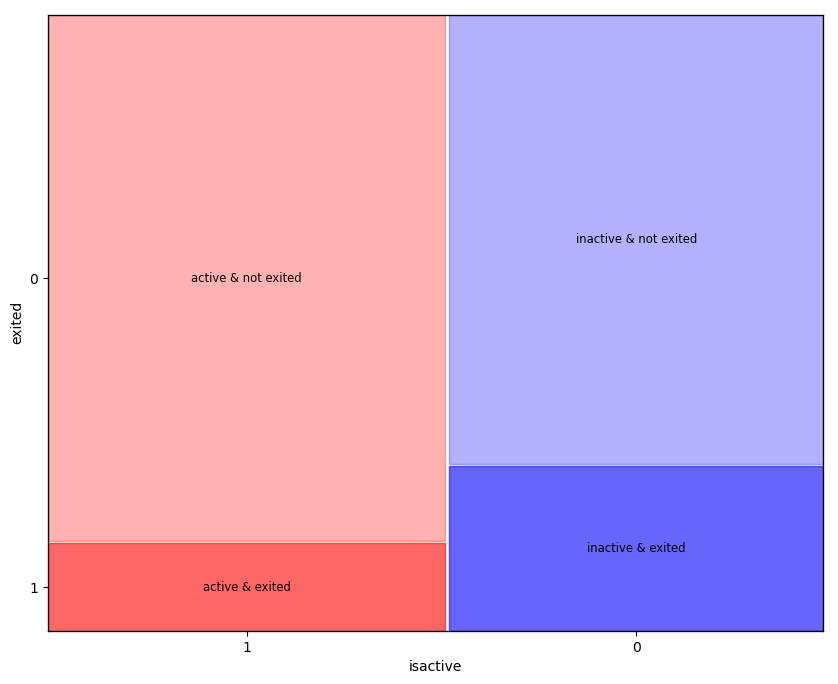

In [18]:
def props(key):
    alpha = {'1': 0.6, '0': 0.3}
    colors = {'0': (0.0, 0.0, 1.0), '1': (1.0, 0.0, 0.0)}
    
    color = colors.get(key[0], (0, 0, 0))
    color_val = alpha.get(key[1], 1)

    return {'color': color + (color_val,)}


def labels(key):
    activation = {'1': 'active', '0': 'inactive'}
    exited = {'1': 'exited', '0': 'not exited'}
    
    label = f'{activation.get(key[0], "unknown")} & {exited.get(key[1], "unknown")}'
    return label
    
    
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(df, ['isactivemember', 'exited'], properties=props, labelizer=labels, ax=ax)
ax.set_xlabel('isactive')
ax.set_ylabel('exited')
plt.show()

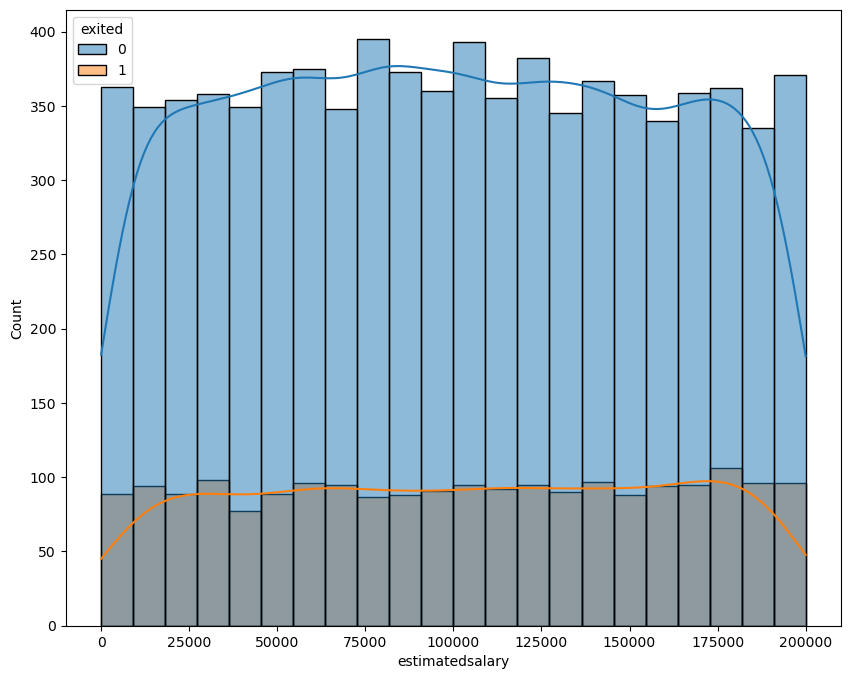

In [19]:
draw_histplot('estimatedsalary', 'exited', figsize=(10, 8))

In [20]:
df.dtypes

surname              object
creditscore           int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
numofproducts         int64
hascrcard             int64
isactivemember        int64
estimatedsalary     float64
exited                int64
age_cat            category
credit_cat         category
dtype: object

In [21]:
df_digit = df.select_dtypes(include=['int64', 'float64']).corr()
df_digit

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


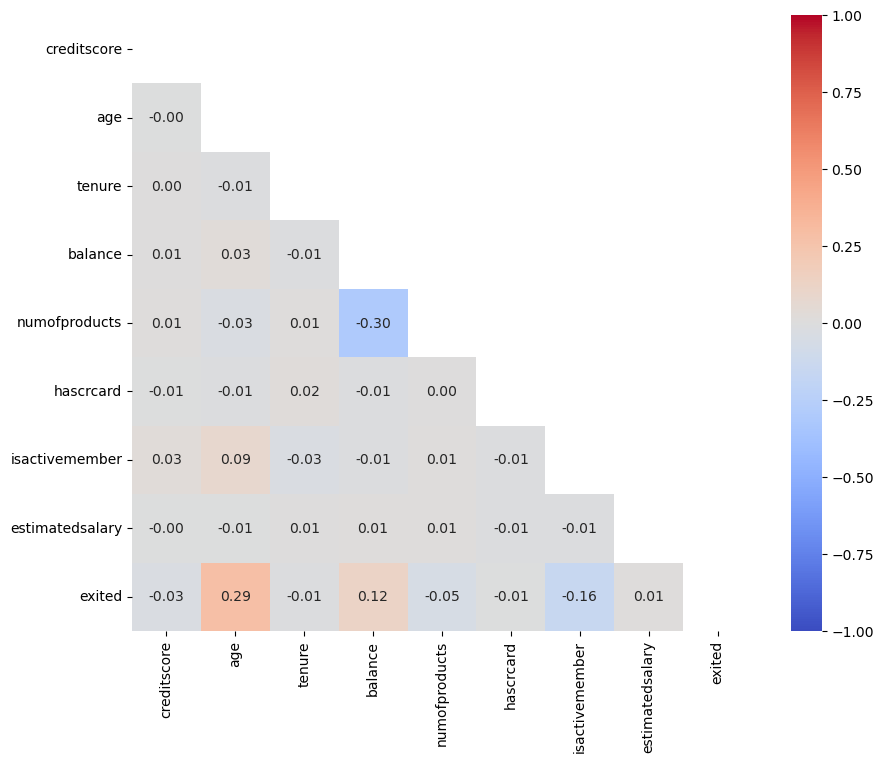

In [22]:
# 숫자 데이터 타입 컬럼만 상관계수 확인
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df_digit, dtype=bool)) # np.triu를 이용해 하삼각 부분만 시각화
sns.heatmap(df_digit, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

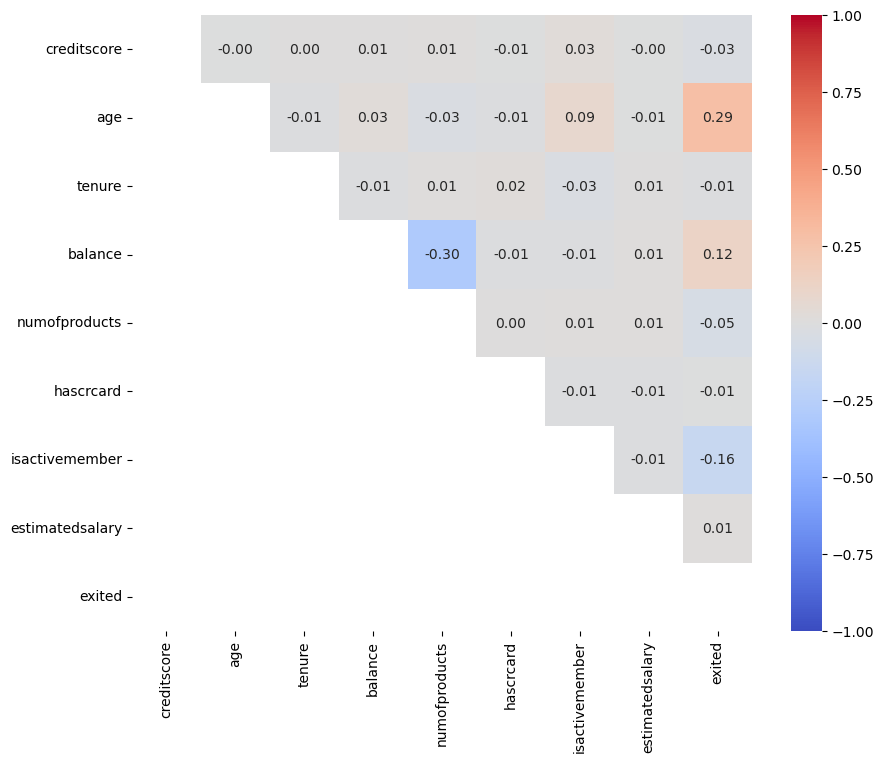

In [23]:
plt.figure(figsize=(10, 8))
mask = np.tril(np.ones_like(df_digit, dtype=bool)) # np.trill로 상삼각 부분만 시각화
sns.heatmap(df_digit, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

- exited를 기준으로 상관계수의 절대값이 0.1 이상인 건 age, balance, isactivemember
- numofproducts와 balance는 상관계수가 -0.3

In [24]:
# 타겟 컬럼 exited를 맨 마지막에 위치시켜 히트맵을 그리기 위해 컬럼 순서를 조정
df = df[['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'age_cat', 'credit_cat', 'exited']]
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,age_cat,credit_cat,exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,40-50,Good,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,40-50,Good,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,40-50,Fair,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,30-40,Good,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,40-50,Excellent,0


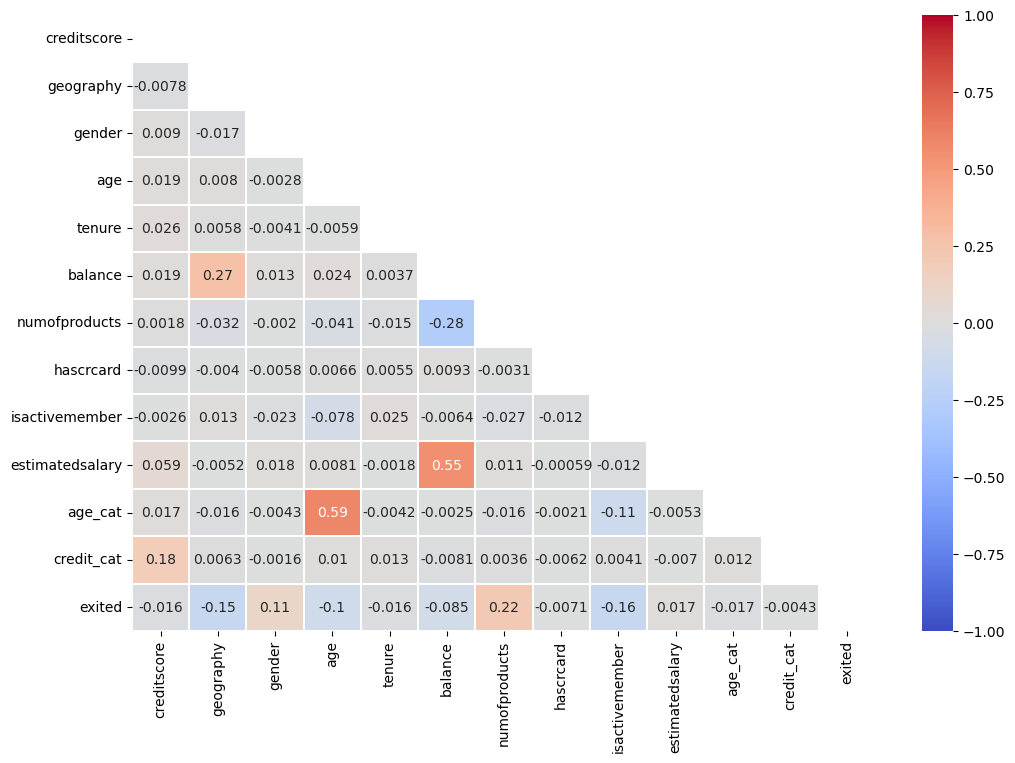

In [25]:
# 범주형 데이터를 포함해서 전체 컬럼에 대한 히트맵
corr_with_cat = df.drop(['surname'], axis=1).apply(lambda x: pd.factorize(x)[0]).corr() # 이름 컬럼은 제외

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_with_cat, dtype=bool))
ax = sns.heatmap(corr_with_cat, mask=mask, xticklabels=corr_with_cat.columns, yticklabels=corr_with_cat.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

- 위에서 확인한 히트맵과 비교했을 때, numofproducts와 exited의 상관계수가 변했음.
- pd.factorize는 입력된 데이터의 타입에 관계없이 각 고유값에 대해 정수형 라벨을 부여하므로, 수치형 데이터와 범주형 데이터를 함께 사용하는 것은 적절치 않음

> 범주형 데이터와 수치형 데이터가 혼합된 데이터의 경우,
1. 수치형 컬럼만 선택해서 .corr()로 상관계수 확인
2. .apply(lambda x: pd.factorize(x)[0])와 같은 방법으로, 범주형 데이터에 대해 각 범주에 고유한 정수를 할당해서 상관계수를 계산. 단, 이 수치 역시 대략적인 척도로만 활용
3. 전체 데이터 세트에 대해 factorize를 하는 것은 권장 되지 않음

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   surname          10000 non-null  object  
 1   creditscore      10000 non-null  int64   
 2   geography        10000 non-null  object  
 3   gender           10000 non-null  object  
 4   age              10000 non-null  int64   
 5   tenure           10000 non-null  int64   
 6   balance          10000 non-null  float64 
 7   numofproducts    10000 non-null  int64   
 8   hascrcard        10000 non-null  int64   
 9   isactivemember   10000 non-null  int64   
 10  estimatedsalary  10000 non-null  float64 
 11  age_cat          9978 non-null   category
 12  credit_cat       10000 non-null  category
 13  exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7), object(3)
memory usage: 957.6+ KB


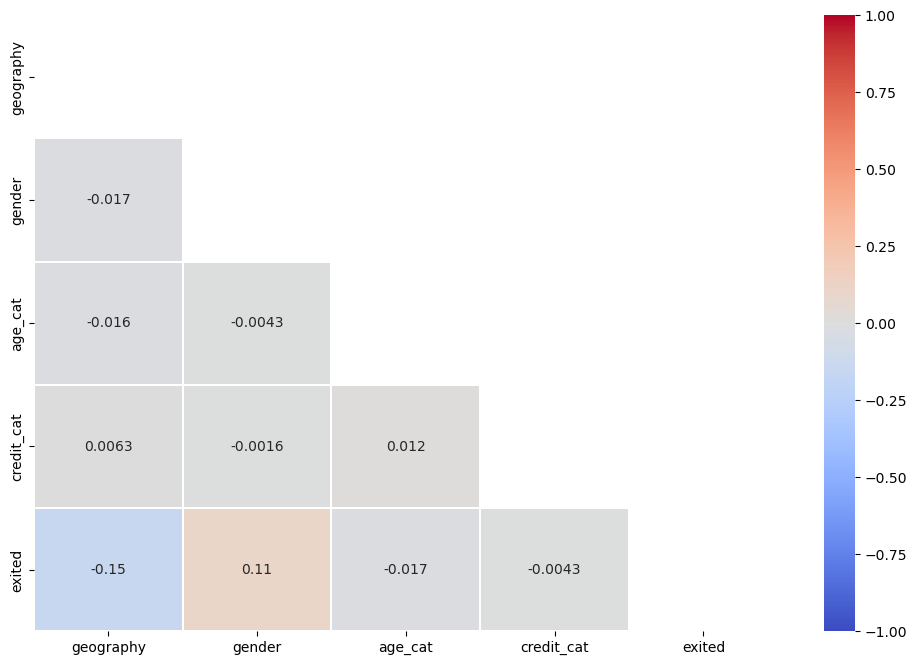

In [27]:
df_cat = df.select_dtypes(include=['object', 'category'])
df_cat = pd.concat([df_cat, df['exited']], axis=1) # 타겟 컬럼과의 상관계수 확인을 위한 것이므로 타겟 컬럼을 더해줍니다

df_cat_corr = df_cat.drop(['surname'], axis=1).apply(lambda x: pd.factorize(x)[0]).corr() # 이름 컬럼은 제외

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_cat_corr, dtype=bool))
ax = sns.heatmap(df_cat_corr, mask=mask, xticklabels=df_cat_corr.columns, yticklabels=df_cat_corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

- geography와 gender만 절대값 0.1 이상. 범주형 데이터에 대해 임의의 정수를 부여한 것이므로 +, -는 중요하지 않음

In [31]:
df['balance_salary_ratio'] = df['balance'] / df['estimatedsalary']
df['tenure_age_ratio'] = df['tenure'] / df['age']
df['total_products'] = df['numofproducts'] + df['hascrcard']
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,age_cat,credit_cat,total_products,exited,balance_salary_ratio,tenure_age_ratio
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,40-50,Good,2,1,0.000000,0.047619
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,40-50,Good,1,0,0.744677,0.024390
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,40-50,Fair,4,1,1.401375,0.190476
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,30-40,Good,2,0,0.000000,0.025641
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,40-50,Excellent,2,0,1.587055,0.046512


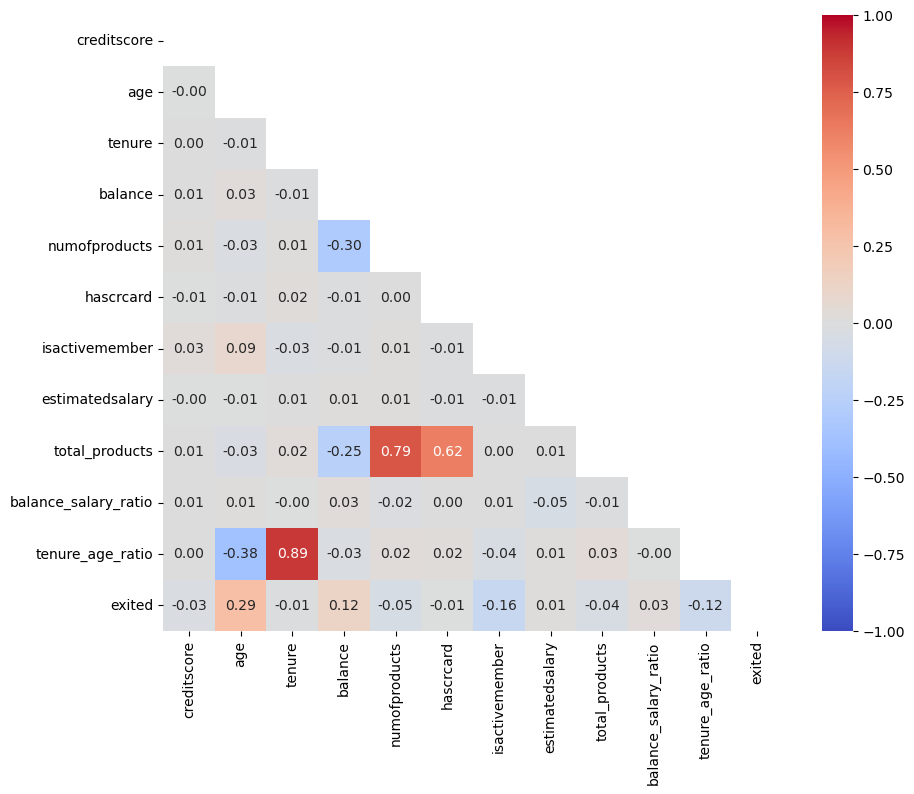

In [32]:
df = df.drop('exited', axis=1).assign(exited=df['exited'])
df_digit = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df_digit, dtype=bool))
sns.heatmap(df_digit, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

- 새로 만든 balance_salary_ration, total_products는 여전히 상관계수가 매우 작음
- tenure_age_ratio는 0.1보다 크지만, age, tenure와의 상관계수가 커서 같이 변수로 사용하게 되면 다중공선성 문제가 발생할 수 있음
- 다중공선성 문제가 있는 경우, 일반적으로는 PCA를 이용해 데이터를 변환하거나 일부 피처를 제거하고 모델링을 진행
- 하지만, 트리 기반 모델은 다중공선성 문제에 대해 덜 예민함. 그래서 어느 정도 상관성이 있는 피쳐들을 같이 선택하기도 하지만, 상관성이 있는 변수들의 특성 중요도가 비슷하게 나타나거나 다른 특성들이 무시될 가능성도 있음

=> 정답은 없고, 도메인 지식과 분석방법 따라 적절한 피쳐를 선택